# Titanic 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

In [2]:
#Importing Data
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df=df.drop(["PassengerId",'Name','Ticket',"Cabin"],axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
#checking unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [11]:
# replacing null values with mode
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [12]:
df["Embarked"].isnull().sum()

0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#applying label encoder to convert object into int
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(df["Embarked"])
pd.Series(df1).unique()

array([2, 0, 1])

In [15]:
df["Embarked"]=df1

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,2
887,1,1,female,19.0,0,0,30.0000,2
888,0,3,female,NaN,1,2,23.4500,2
889,1,1,male,26.0,0,0,30.0000,0


In [17]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Sex"])
pd.Series(df2).unique()

array([1, 0])

In [18]:
df["Sex"]=df2

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [20]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Pair Plot

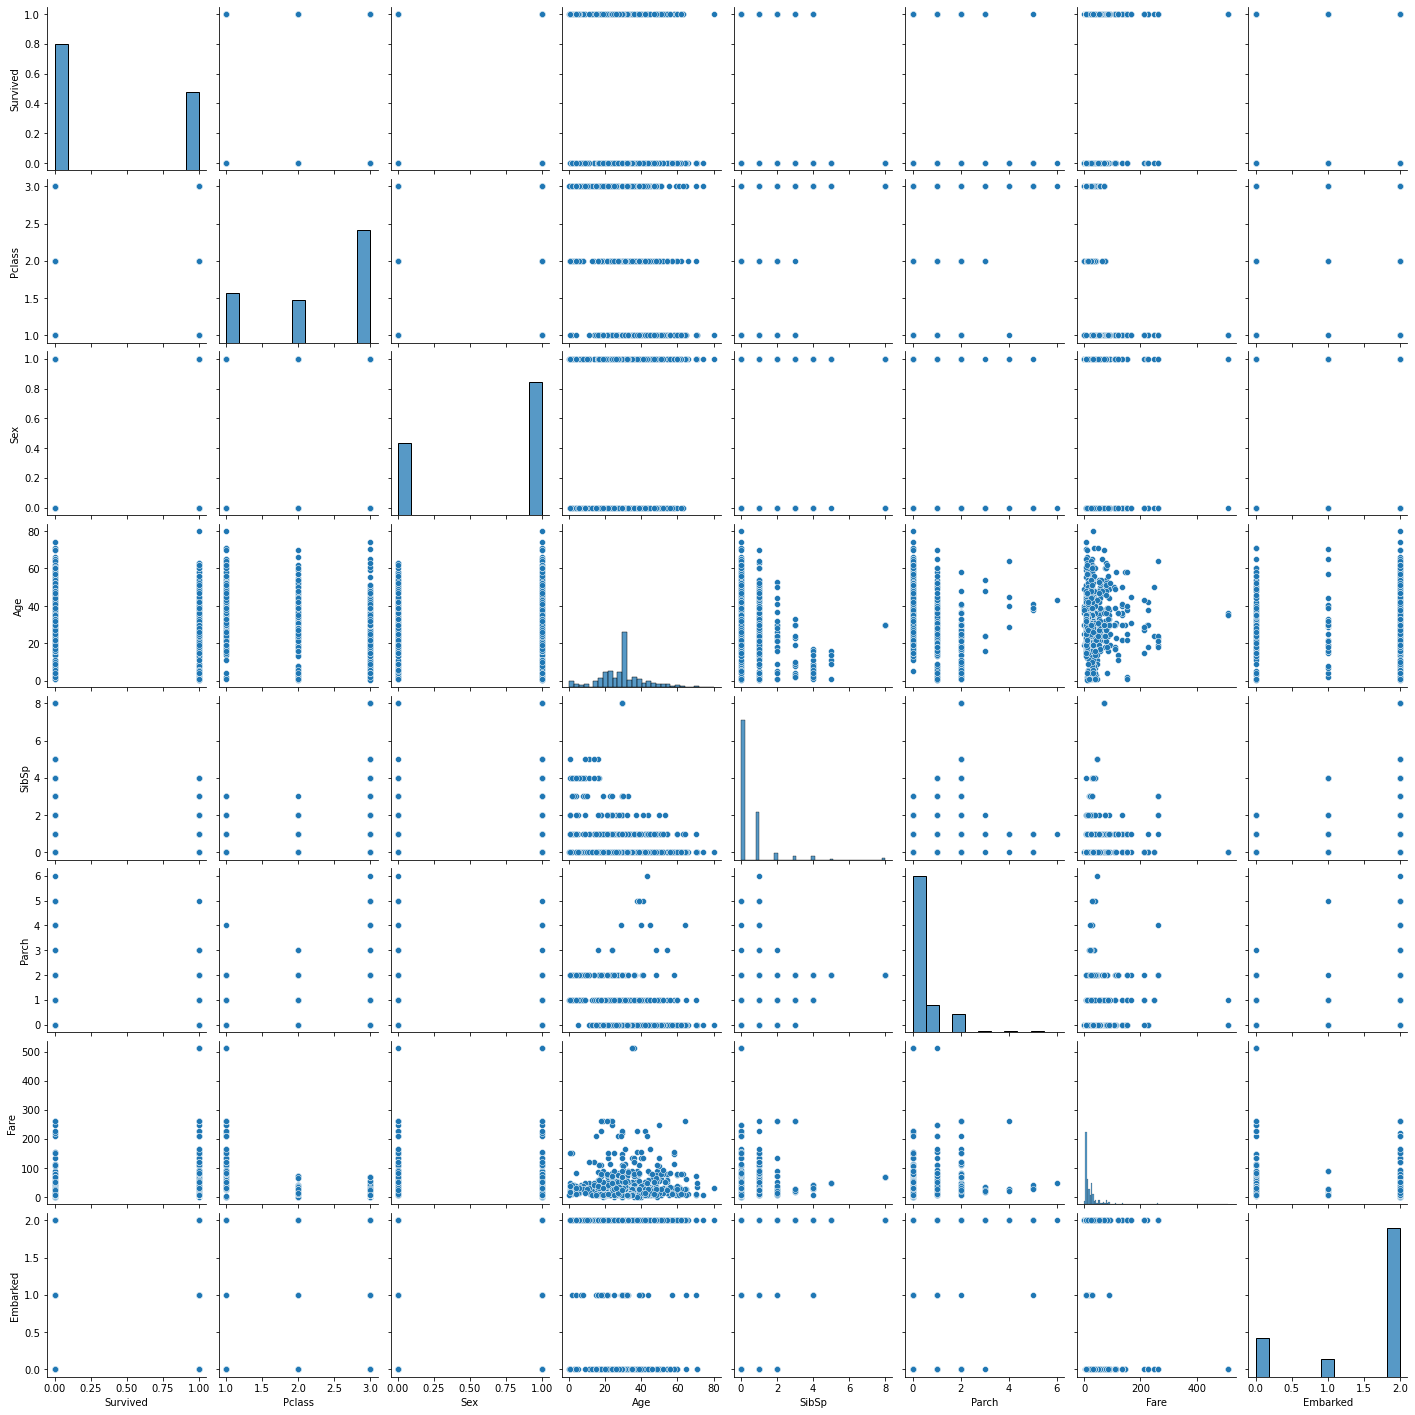

In [22]:
sns.pairplot(df)

# Dist Plot

0.4777174662568536
-0.6294858816096934
-0.6178784065548295
0.4337562902461274
3.6891276847759507
2.7444867379203735
4.7792532923723545
-1.2626927433430535


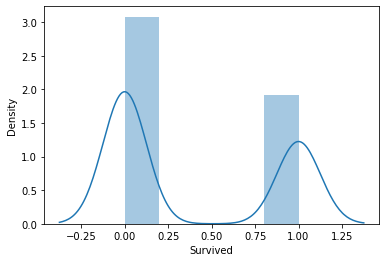

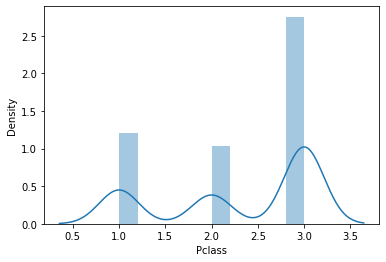

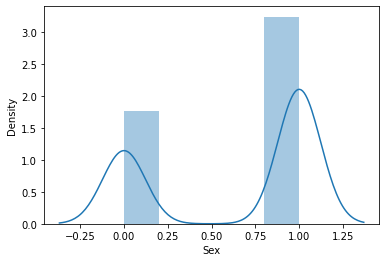

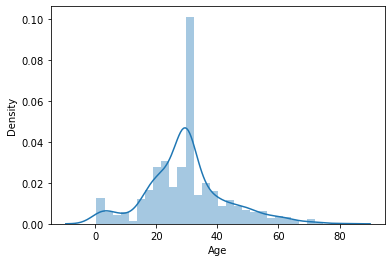

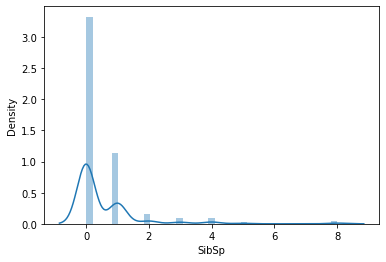

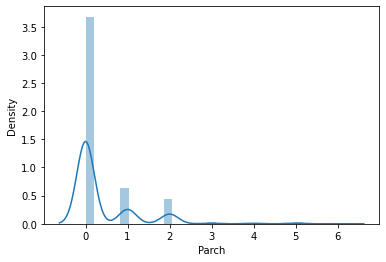

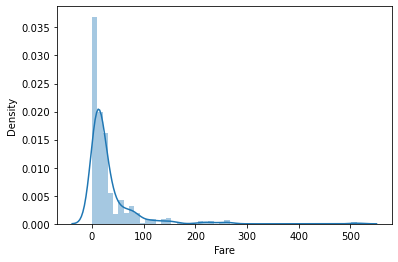

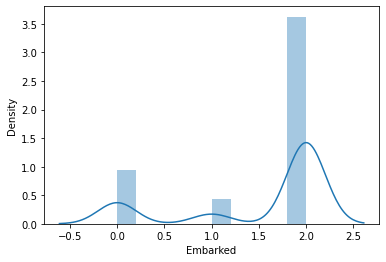

In [23]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [24]:
# To find corelation using Heatmap and VIF technique
df_corr=df.corr().abs()
df_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,0.338481,0.543351,0.069809,0.035322,0.081629,0.257307,0.167675
Pclass,0.338481,1.000000,0.131900,0.331339,0.083081,0.018443,0.549500,0.162098
Sex,0.543351,0.131900,1.000000,0.084153,0.114631,0.245489,0.182333,0.108262
Age,0.069809,0.331339,0.084153,1.000000,0.232625,0.179191,0.091566,0.026749
SibSp,0.035322,0.083081,0.114631,0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,0.245489,0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.224719
Embarked,0.167675,0.162098,0.108262,0.026749,0.068230,0.039798,0.224719,1.000000


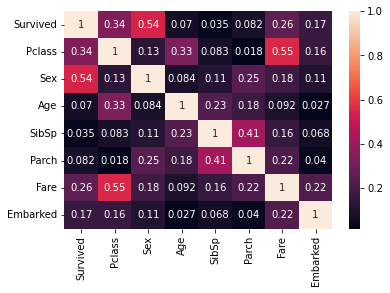

In [25]:
sns.heatmap(df_corr,annot=True)
plt.show()
# Low multicollinearity exist between features and labels 

In [26]:
X=df.drop(columns="Survived")
Y=df["Survived"]

In [27]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.671580,Pclass
1,1.108869,Sex
2,1.205639,Age
3,1.282325,SibSp
4,1.322550,Parch
5,1.648696,Fare
6,1.079324,Embarked


In [28]:
df["Fare"]=np.sqrt(df["Fare"])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        2.085004
Embarked   -1.264823
dtype: float64

In [29]:
df["Fare"]=np.sqrt(df["Fare"])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        0.519679
Embarked   -1.264823
dtype: float64

In [30]:
z_score=zscore(df[["Age"]])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [31]:
df.skew()

Survived    0.470232
Pclass     -0.640927
Sex        -0.606144
Age         0.253127
SibSp       3.682898
Parch       2.740479
Fare        0.522542
Embarked   -1.271471
dtype: float64

0.4694337014812748
-0.6398391978726531
-0.6051147140718676
0.2526972493102237
3.676645446948431
2.7358267725854053
0.5216548413237956
-1.2693122909546386


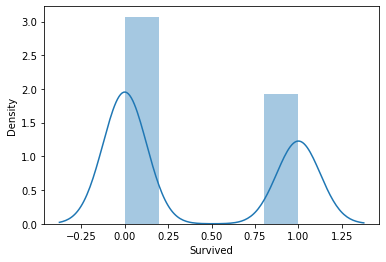

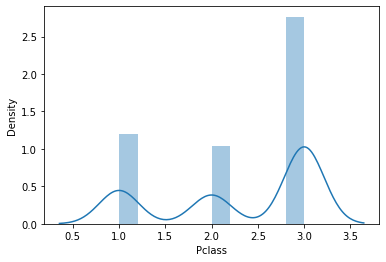

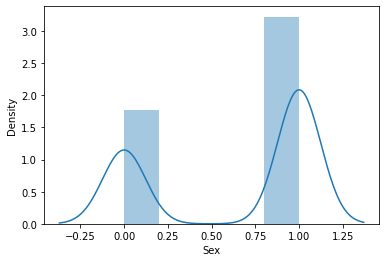

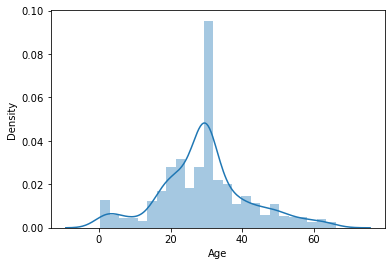

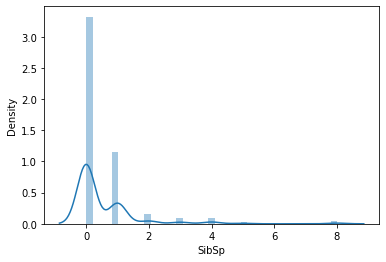

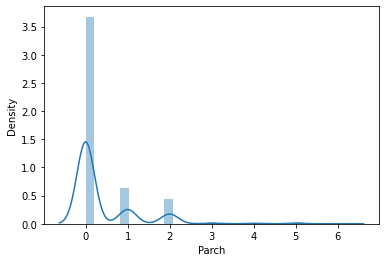

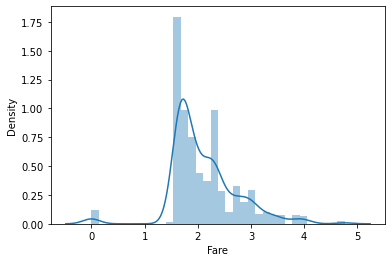

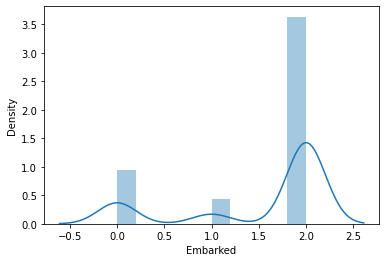

In [32]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [33]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [34]:
X=df.drop(["Survived"],axis=1)
Y=df.Survived

# Count Plot

<AxesSubplot:xlabel='Survived', ylabel='count'>

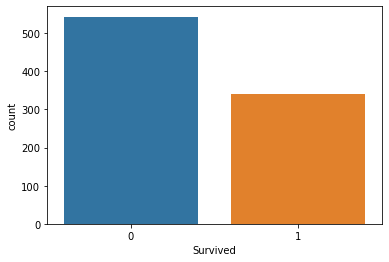

In [35]:
sns.countplot(Y)

In [36]:
Y.value_counts()

0    543
1    341
Name: Survived, dtype: int64

In [37]:
scaler=StandardScaler()

In [38]:
X_scaled=scaler.fit_transform(X)

# Modelling With Logistic Regression

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [43]:
Y_pred=lr.predict(X_test)
Y_pred_train=lr.predict(X_train)

In [44]:
accuracy=accuracy_score(Y_test,Y_pred)

In [45]:
accuracy

0.8144796380090498

In [46]:
conf_mat=confusion_matrix(Y_test,Y_pred)

In [47]:
conf_mat

array([[117,  16],
       [ 25,  63]], dtype=int64)

In [48]:
auc=roc_auc_score(Y_test,Y_pred)

In [49]:
auc

0.7978041695146958

In [50]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       133
           1       0.80      0.72      0.75        88

    accuracy                           0.81       221
   macro avg       0.81      0.80      0.80       221
weighted avg       0.81      0.81      0.81       221



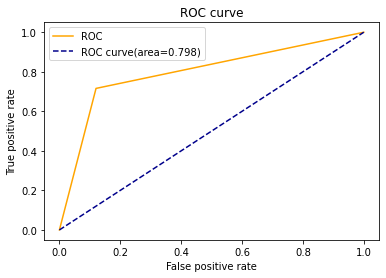

In [51]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


# Logistic Regression model using Hyperparameter


In [53]:
scaler=StandardScaler()

In [54]:
X_scaled=scaler.fit_transform(X)

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [56]:
lr=LogisticRegression()

In [57]:
param_grid=[
    {'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
    }
]

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
clf=GridSearchCV(lr,param_grid,cv=3,n_jobs=-1)

In [60]:
best_clf=clf.fit(X,Y)

In [61]:
best_clf.best_params_

{'C': 0.23357214690901212, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}

In [62]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [63]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [64]:
accuracy=accuracy_score(Y_test,Y_pred)

In [65]:
accuracy

0.8099547511312217

In [66]:
conf_mat=confusion_matrix(Y_test,Y_pred)

In [67]:
conf_mat

array([[118,  15],
       [ 27,  61]], dtype=int64)

In [68]:
auc=roc_auc_score(Y_test,Y_pred)

In [69]:
auc

0.7901999316473002

In [70]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       133
           1       0.80      0.69      0.74        88

    accuracy                           0.81       221
   macro avg       0.81      0.79      0.80       221
weighted avg       0.81      0.81      0.81       221



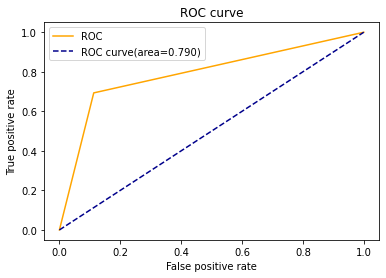

In [71]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# USING KNN 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest,f_classif

In [74]:
X=df.drop(["Survived"],axis=1)
Y=df.Survived

In [75]:
scaler=StandardScaler()

In [76]:
X_scaled=scaler.fit_transform(X)

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [78]:
knn=KNeighborsClassifier()

In [79]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [80]:
Y_pred=knn.predict(X_test)

In [81]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[114,  19],
       [ 25,  63]], dtype=int64)

In [82]:
accuracy=accuracy_score(Y_test,Y_pred)

In [83]:
accuracy

0.8009049773755657

In [84]:
auc=roc_auc_score(Y_test,Y_pred)

In [85]:
auc

0.786525974025974

In [86]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       133
           1       0.82      0.69      0.75        88

    accuracy                           0.82       221
   macro avg       0.82      0.80      0.81       221
weighted avg       0.82      0.82      0.82       221



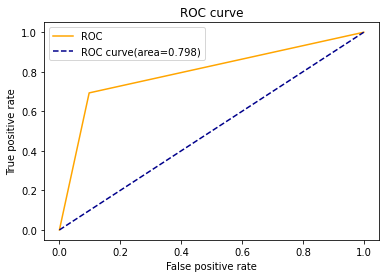

In [148]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# USING KNN WITH HYPERPARAMETER TUNING

In [89]:
X=df.drop(["Survived"],axis=1)
Y=df.Survived

In [90]:
scaler=StandardScaler()

In [91]:
X_scaled=scaler.fit_transform(X)

In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [93]:
knn=KNeighborsClassifier()

In [94]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [95]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [96]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [97]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [98]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [99]:
accuracy=accuracy_score(Y_test,Y_pred)

In [100]:
accuracy

0.8461538461538461

In [101]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[125,   8],
       [ 26,  62]], dtype=int64)

In [102]:
auc=roc_auc_score(Y_test,Y_pred)

In [103]:
auc

0.8221975393028025

In [104]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       133
           1       0.89      0.70      0.78        88

    accuracy                           0.85       221
   macro avg       0.86      0.82      0.83       221
weighted avg       0.85      0.85      0.84       221



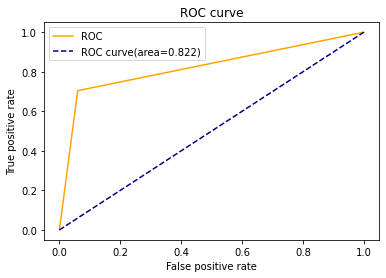

In [105]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# MODELLING WITH RANDOM FOREST


In [107]:
X=df.drop(["Survived"],axis=1)
Y=df.Survived

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[112  21]
 [ 22  66]]
0.8054298642533937
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       133
           1       0.76      0.75      0.75        88

    accuracy                           0.81       221
   macro avg       0.80      0.80      0.80       221
weighted avg       0.81      0.81      0.81       221



# RANDOM FOREST WITH HYPERPARAMETER (RANDOM AND GRID)

In [111]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [112]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [113]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [114]:
best_random_grid=rf_randomcv.best_estimator_

In [115]:
best_random_grid

RandomForestClassifier(max_depth=560, max_features='sqrt', min_samples_split=10,
                       n_estimators=200)

In [116]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[120  13]
 [ 24  64]]
Accuracy Score 0.832579185520362
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.87       133
           1       0.83      0.73      0.78        88

    accuracy                           0.83       221
   macro avg       0.83      0.81      0.82       221
weighted avg       0.83      0.83      0.83       221



# GRID SEARCH CV

In [117]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [0, 100, 200, 300, 400]}


In [119]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [560],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [120]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=560, max_features='sqrt', min_samples_split=9,
                       n_estimators=300)

In [121]:
best_grid=grid_search.best_estimator_

In [122]:
best_grid

RandomForestClassifier(max_depth=560, max_features='sqrt', min_samples_split=9,
                       n_estimators=300)

In [123]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[122  11]
 [ 23  65]]
Accuracy Score 0.8461538461538461
Classification report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88       133
           1       0.86      0.74      0.79        88

    accuracy                           0.85       221
   macro avg       0.85      0.83      0.84       221
weighted avg       0.85      0.85      0.84       221



In [124]:
accuracy=accuracy_score(Y_test,Y_pred)

In [125]:
accuracy

0.8461538461538461

In [126]:
auc=roc_auc_score(Y_test,Y_pred)

In [127]:
auc

0.8279647983595354

In [128]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

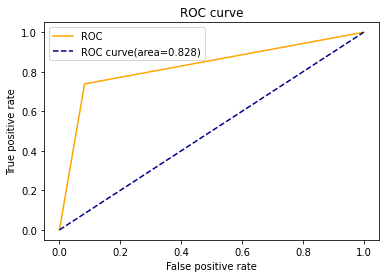

In [129]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Gradient Boosting

In [132]:
gbdt=GradientBoostingClassifier()

In [133]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [134]:
Y_pred=gbdt.predict(X_test)

In [135]:
accuracy=accuracy_score(Y_test,Y_pred)

In [136]:
accuracy

0.8190045248868778

In [137]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[120,  13],
       [ 27,  61]], dtype=int64)

In [138]:
auc=roc_auc_score(Y_test,Y_pred)

In [139]:
auc

0.7977187286397813

In [140]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       133
           1       0.82      0.69      0.75        88

    accuracy                           0.82       221
   macro avg       0.82      0.80      0.81       221
weighted avg       0.82      0.82      0.82       221



In [141]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

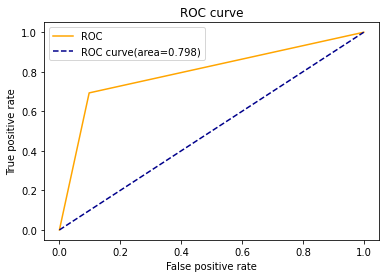

In [142]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# GBDT WITH HYPER PARAMETER

In [143]:
gbdt=GradientBoostingClassifier()

In [144]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [145]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [146]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [149]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [150]:
Y_pred=clf.predict(X_test)

In [151]:
accuracy=accuracy_score(Y_test,Y_pred)

In [152]:
accuracy

0.8280542986425339

In [153]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[114,  19],
       [ 19,  69]], dtype=int64)

In [154]:
auc=roc_auc_score(Y_test,Y_pred)

In [155]:
auc

0.8206168831168832

In [156]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       133
           1       0.78      0.78      0.78        88

    accuracy                           0.83       221
   macro avg       0.82      0.82      0.82       221
weighted avg       0.83      0.83      0.83       221



In [157]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

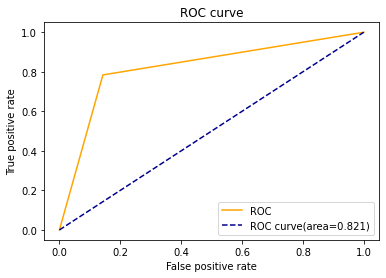

In [158]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Conclusion:
1. Conducted 4 models on Titanic dataset namely, Logistic Regression, KNN, Random forest and Gradient Boosting with Hyperparameter tuning
2. It comes to a conclusion that Random Forest model is providing best accuracy, AUC and ROC curve for Titanic dataset
3. ACCURACY= 0.8461538461538461
4. AUC= 0.8279647983595354

In [159]:
md=[lr,knn,rf,gbdt]
import pickle
filename="Titanic.pkl"
pickle.dump(md,open(filename,"wb"))